In [ ]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.67 ms (started: 2023-05-13 14:23:08 +00:00)


# Downloading the dataset directly from the kaggle

In [ ]:
!pip install -U -q kaggle
!mkdir ~/.kaggle  #Create a kaggle dir
## Upload the json file for API of your account, 
## youtube videoexplaining detailed walkthrough process to download json <https://www.youtube.com/watch?v=57N1g8k2Hwc>
from google.colab import files
uploaded = files.upload()

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Saving kaggle.json to kaggle (2).json
time: 31.6 s (started: 2023-05-13 14:23:11 +00:00)


In [ ]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d falgunipatel19/biomedical-text-publication-classification #will download as zip file

biomedical-text-publication-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
time: 1.82 s (started: 2023-05-13 14:23:45 +00:00)


In [ ]:
!mkdir /content/NLP_PRD #Creation of a new directory
!unzip /content/biomedical-text-publication-classification.zip -d /content/NLP_PRD #unzip the file

mkdir: cannot create directory ‘/content/NLP_PRD’: File exists
Archive:  /content/biomedical-text-publication-classification.zip
replace /content/NLP_PRD/alldata_1_for_kaggle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/NLP_PRD/alldata_1_for_kaggle.csv  
time: 16.3 s (started: 2023-05-13 14:23:55 +00:00)


# Extracting the information from the dataset

In [ ]:
#!pip install pandas
#!pip install numpy
import pandas as pd #data manipulation and analysis
import numpy as np # fundamental package for scientific computing
#reading the data as a csv file 
df=pd.read_csv('/content/NLP_PRD/alldata_1_for_kaggle.csv', encoding='ISO-8859-1')
#Prints the first 6 rows of the dataset
df.head()
#Prints information about the DataFrame-the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB
time: 4.69 s (started: 2023-05-13 14:24:15 +00:00)


# Cleaning and data modification before Text Preprocessing
- Drop off the irrelevant column "unamed"

In [ ]:
#Cleaning and data modification before Text Preprocessing
# Drop off the irrelevant column "unamed"
df=df.drop('Unnamed: 0',axis=1)
#Rename the columns: 0 as Class and a as Text
df = df.rename(columns={'0': 'Class','a':'Text'})
df.head()

,Class,Text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


time: 14.6 ms (started: 2023-05-13 14:24:24 +00:00)


# Checking for duplicates and Removing the duplicates, if exist
- Checking and removing duplicates help in reducing the time complexity during data processing

In [ ]:
# #Checking for unique list in the "Text" column 
pd.DataFrame(df['Text'].unique())
print(df['Class'].value_counts().reset_index())
# dropping duplicate entries.
df.drop_duplicates(inplace=True)
df.info()

            index  Class
0  Thyroid_Cancer   2810
1    Colon_Cancer   2580
2     Lung_Cancer   2180
<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 7497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   996 non-null    object
 1   Text    996 non-null    object
dtypes: object(2)
memory usage: 23.3+ KB
time: 568 ms (started: 2023-05-13 14:24:28 +00:00)


            index  Class
0     Lung_Cancer    452
1  Thyroid_Cancer    283
2    Colon_Cancer    261


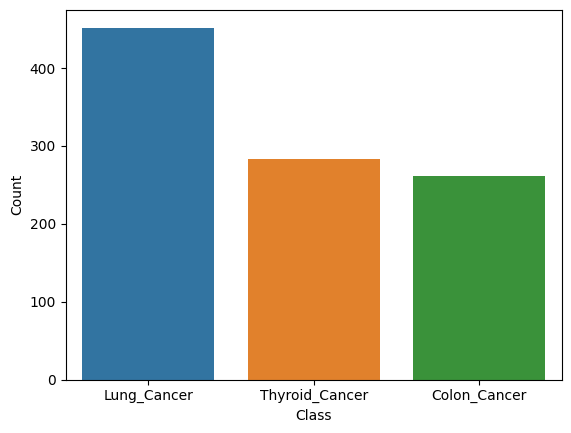

time: 237 ms (started: 2023-05-13 14:24:32 +00:00)


In [ ]:
#checking for balance datasets
#!pip install seaborn
#!pip install matplotlib

import seaborn as sns
import matplotlib.pyplot as plt
print(df['Class'].value_counts().reset_index())
barplt = sns.barplot(df['Class'].value_counts().reset_index(),y="Class",x="index")
barplt.set_xlabel('Class')
barplt.set_ylabel('Count')
plt.show()

# Text preprocessing
- It is an important and one the most essential step before building any model in Natural Language Processing. 



# Checking non-english Texts.
- Langdetect is a python package that allows for checking the language of the text.
 


In [ ]:
!pip install langdetect
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

#This function takes into each text in the row and check the languange of the text. If language of the text is english then return "en" otherwise return "nan
def detect_lang(texts):
    for txt in texts:
        try:
            detectlang=detect(txt)
            if detectlang !='en':
                return False
        except LangDetectException:
            return np.nan
    return True
    
# Extract the text column as a list
txt_col = df['Text'].tolist()

# Call the function on the text column
result = detect_lang(txt_col)

# Print the result
print(result)  # Output: False

# Below code is useful if the coloumn input is having mix of other languages. Thus, it is important to retain the below.

#storing the english text
#df["language"] = df["Text"].apply(detect_lang)
#selecting the rows marked as "en"
#f=df[df.language == "en"] 
#df['language']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=38d148123b5b58bb481fb562585e32461a41d264bfdcab02c9d9c528559533b9
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
True
time: 4min 15s (started: 2023-05-13 09:48:52 +00:00)


# Removal of Extra Whitespace
- A text may contain extra whitespace which is not desired as they increase the text size and not add any value to the data. Hence removing extra whitespace is a trivial but important text preprocessing step.


In [ ]:
#Defining a fuction for white space removal by splitting the text and joining it back on the basis of single whitespace.
def remove_whitespace(text):
    return  " ".join(text.split())
df['whitespace']=df['Text'].apply(remove_whitespace)
df.to_csv('df_extra_whitespace_removal_2.csv')
df.head(23)

,Class,Text,whitespace
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...
5,Thyroid_Cancer,This study was performed to explore the effec...,This study was performed to explore the effect...
6,Thyroid_Cancer,This study was performed assess the clinical ...,This study was performed assess the clinical o...
7,Thyroid_Cancer,Journal of International Medical Research  Th...,Journal of International Medical Research  Th...
8,Thyroid_Cancer,Gastric cancer GC persists as a worldwide pub...,Gastric cancer GC persists as a worldwide publ...
9,Thyroid_Cancer,Scars Burns HealingVolume  reuse guideli...,Scars Burns HealingVolume  reuse guidelinessa...


time: 1.5 s (started: 2023-05-13 14:24:40 +00:00)


#  Expansion of Contractions: 
- Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.
- Expanding contractions extremely important as it reduces the redundancy in the data and makes the code computationally cheaper.
- There are different ways to handle expand contractions using different libraries. The best recommended library is "pycontractions" which is the most accurate package available and super easy to use but it is computationally very expensive.
- For text classification where ambiguity of text is not important, the python package "contractions" works well. But for task like sentiment analysis, not taking into account the ambiguity of contractions leads to errors and reduces the quality of the text data.

In [ ]:
!pip install contractions
# import library
import contractions
def expand_contractions(text):
    expanded_words = []   
    for word in text.split():
    # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_words)
    return expanded_text
df['expanded_text']=df['whitespace'].apply(expand_contractions)
df.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Class,Text,whitespace,expanded_text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...


time: 14.2 s (started: 2023-05-13 14:24:44 +00:00)


# Punctuation Removal
- all the punctuations from the text are removed. 
- The "string" library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [ ]:
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['punc_free_text']= df['expanded_text'].apply(lambda x:remove_punctuation(x))
df.head()


,Class,Text,whitespace,expanded_text,punc_free_text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...


time: 4.35 s (started: 2023-05-13 14:25:00 +00:00)


# Spelling Correction
- Correcting spelling is a crucial step in NLP to achieve accurate results for a task.


In [ ]:
!pip install symspellpy
from symspellpy import SymSpell, Verbosity
import pkg_resources
# load a dictionary (this one consists of 82,765 English words)
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
# term_index: column of the term 
# count_index: column of the term's frequency
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
def symspell_corrector(input_term):
  # look up suggestions for multi-word input strings 
  suggestions = sym_spell.lookup_compound( 
      phrase=input_term,  
      max_edit_distance=2,  
      transfer_casing=True,  
      ignore_term_with_digits=True, 
      ignore_non_words=True, 
      split_by_space=True 
  ) 
  # display the correction
  for suggestion in suggestions: 
      return f"{suggestion.term}"
df['Spell_Correct_symspell'] = [symspell_corrector(df['punc_free_text'][i]) for i in range(df.shape[0])]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KeyboardInterrupt: ignored

time: 13.7 s (started: 2023-05-13 14:25:04 +00:00)


# Removing Genome sequences
- Genome sequences consists of nucleotides 'A', 'G', 'C', 'T' and 'U', so this has been identified and removed using regular expressions. This dataset has only few genome sequences and hence removing them may not reduce the execution time.

 

- For financial text classification, there may be certain terminologies, jargons, or domain-specific keywords that can be identified and removed using techniques such as frequent word analysis and POS tagging. Regular expressions might not work in such scenario.

In [ ]:
# To check if a column contains genome_sequence
import re
def has_genome_sequence(column_data):
    has_genome = False
    for data in column_data:
        # Use regular expression to check for genome_sequence
        if re.search(r'\b[A-Z][ACTGU]{4,}\b', data):
            has_genome = True
            break
    return has_genome

# Example usage
column_data = df['punc_free_text']
result = has_genome_sequence(column_data)
if result:
    print("The column contains genome sequences.")
else:
    print("The column does not contain genome sequences.")

    # List and Count of genome_sequences

import pandas as pd
import re

# Define a regular expression pattern to match genome_sequences
pattern = r"\b[A-Z][AGCTU]{4,}\b"

# Function to extract genome_sequences from text
def extract_genome_sequences(text):
    genome_sequences = re.findall(pattern, text)
    return genome_sequences

df['genome_sequences'] = df['punc_free_text'].apply(extract_genome_sequences)

# Convert the list of genome sequences into a set to get unique values
unique_genome_sequences = set([agctu for genome_sequences in df['genome_sequences'] for agctu in genome_sequences])

# Convert the set of unique genome_sequences into a list
unique_genome_sequences = list(unique_genome_sequences)

# Get the count of abbreviations
genome_sequence_count = sum(df['genome_sequences'].apply(lambda x: len(x)))

print(unique_genome_sequences)
print("genome_sequence count:", genome_sequence_count)
#genome_sequence count: 1574

# Removing genome sequences
import re
pattern = r"\b[A-Z][AGCTU]{4,}\b"

# Function to extract genome_sequences from text
def remove_genome_sequences(text):
    genome_sequences = re.sub(pattern, '', text)
    return genome_sequences


df['genome_sequences'] = df['punc_free_text'].apply(remove_genome_sequences)
df.head()

The column contains genome sequences.
['AGTTTGGGATAGTGGTTAATATTTT', 'ACGTTGGATGTGGAAAGGACAGTTCCAGAG', 'GCCAGTGGACTCCACGAC', 'TAATCCCTCTGGTAAGCATAAGATATA', 'ACGTTGGATGCAAAATCAAGGTTTAAAGTC', 'ACGAGTTCCCAGGAGAATCAGA', 'TCGGCA', 'TCTAC', 'GGGAACGTCGCACATGTAT', 'CCATGACCCCAAAGC', 'ACGTTGGATGCGTTGATGTTCCTTGGCTTG', 'AGAAGGCTGGGGCTCATTTG', 'CCGGGCTGACATCTAAATCTGA', 'ACGTTGGATGAACGAGTTTCGCTGGCAGAG', 'GGAGACTCTCAGGGTCGAAA', 'TTTGAG', 'CGCAGCTCATTGTAGAAGGTGTGG', 'ACGTTGGATGCCCAGTCTATGGAGTTTCTG', 'ACGTTGGATGAAGGACGAGTTAATGGGTGC', 'TTCACC', 'GCAGCC', 'TCCTTC', 'CGCGTGACCG', 'GGTGCAGCAGCAGAG', 'GCTGGTGTGTGTTTCCTTTCA', 'CTAAT', 'GCCGTTCCGAAAGTTGCCTT', 'ACAGGTACGTTAATAGTTAATAGCGT', 'CCGGG', 'GAGTAGCGACTCCAGAAGT', 'ACGTTGGATGACCCTACCATGACAAACCCG', 'CTCTGTCTCCATCTTCTC', 'CCCAATGGGAAACTCAAA', 'ACGTTGGATGTGAGCTGTTTCAGCCAAGAG', 'ACCACA', 'TTGCG', 'ACGTTGGATGAAAGGACACACACAGAGGAG', 'GCTTGTTCTGGCTGATGTCCTT', 'ACGTTGGATGGGGCGGCATTCATAGTTCAG', 'GTTTCG', 'CATTG', 'DCACA', 'GCCGCA', 'TTCCTGATGTCCACGTCGC', 'GAGCCA

,Class,Text,whitespace,expanded_text,punc_free_text,genome_sequences
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,The adopted strategy was the same as that use...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...


time: 1.02 s (started: 2023-05-13 14:25:24 +00:00)


 # Checking for Abbreviations 
- The current dataset has a large number of abbreviations in the corpus. For such an advanced pre-trained model, expansion can be obtained.The expansion of abbreviations is obtained through a pre-trained model "en_core_web_sm" from "spacy" library in python. The choice of the pre-trained model depend on the corpus and the task to be performed.
- This is an important step in financial data analysis as well.The code segment is added only for the reference.

In [ ]:
# To check if a column contains abbreviations
import re
def has_abbreviations(column_data):
    has_abbrev = False
    for data in column_data:
        # Use regular expression to check for abbreviations
        if re.search(r'\b[A-Z]{2,}\b', data):
            has_abbrev = True
            break
    return has_abbrev

# Example usage
column_data = df['genome_sequences']
result = has_abbreviations(column_data)
if result:
    print("The column contains abbreviations.")
else:
    print("The column does not contain abbreviations.")

The column contains abbreviations.
time: 3.04 ms (started: 2023-05-13 14:25:33 +00:00)


In [ ]:
# List and Count of abbreviations

import pandas as pd
import re

# Define a regular expression pattern to match abbreviations
pattern = r"\b[A-Z]{2,}\b"

# Function to extract abbreviations from text
def extract_abbreviations(text):
    abbreviations = re.findall(pattern, text)
    return abbreviations

# Apply the function to the column of interest
df['abbreviations'] = df['genome_sequences'].apply(extract_abbreviations)
#print(df['abbreviations'])
# Convert the list of abbreviations into a set to get unique values
unique_abbreviations = set([abbr for abbreviations in df['abbreviations'] for abbr in abbreviations])

# Convert the set of unique abbreviations into a list
unique_abbreviations = list(unique_abbreviations)

# Get the count of abbreviations
abbreviation_count = sum(df['abbreviations'].apply(lambda x: len(x)))

print("List of abbreviations:")
print(unique_abbreviations)
print("Abbreviation count:", abbreviation_count)
#Abbreviation count: 640350



List of abbreviations:
['XR', 'PDC', 'VEGFVEGFR', 'VAP', 'BME', 'TCR', 'CEF', 'GPT', 'NWO', 'TGC', 'WC', 'IMRT', 'LSD', 'CESD', 'TCGAR', 'GAPLINC', 'THEIR', 'LION', 'MJV', 'MJD', 'ASPM', 'GABP', 'ADM', 'IVIS', 'SCAI', 'ACOG', 'AML', 'MGL', 'AMB', 'FFH', 'MMPTIMP', 'TLD', 'CMFDA', 'NPJ', 'NDS', 'KIM', 'LDT', 'TXNRD', 'ASUESGASUESG', 'LAS', 'TP', 'ONLINE', 'VELOUR', 'NMF', 'XIIIA', 'FLAGNC', 'FMDVFMDV', 'REACTOME', 'CARCINOMA', 'HTMB', 'READ', 'TRAE', 'CAMS', 'AB', 'MEDILINE', 'OUT', 'IMPACT', 'CPAP', 'VEGFR', 'POF', 'USAIRCCS', 'AJCCTNM', 'MRP', 'QS', 'GAA', 'ODG', 'RANKRANKLOPG', 'OLINDAOLINDA', 'TJ', 'MPACT', 'CLNM', 'PANTHER', 'GY', 'FAIMBE', 'GSH', 'HPAI', 'FQW', 'YBW', 'LDLC', 'CB', 'DATA', 'PFS', 'RIPA', 'VV', 'RW', 'ACKNOWLEDGEMENT', 'ALKTKI', 'IIB', 'XUE', 'HCCNAFLD', 'CC', 'MAGRIT', 'IDF', 'TI', 'TMA', 'HRS', 'CPG', 'JMB', 'ICG', 'MB', 'US', 'RPTD', 'WHR', 'SSI', 'QI', 'ACE', 'SESCD', 'ICPC', 'KIDNEY', 'GC', 'UTY', 'NLIPMT', 'GFC', 'IJ', 'HBVDNA', 'UMLS', 'RRSEXT', 'OOR', 'CEMC

In [ ]:
# ####Expansion of abbreviations.
# #!pip install spacy
# #!pip install scispacy
# import sys
# sys.path.append('C:\\Users\\shsarma\\Desktop\\Deloitte_Course_Work\\MRM\\PRD-Credit Risk\\Data-Code\\scispacy-main\\scispacy-main')
# #import scispacy
# import spacy
# import scispacy
# #!python -m spacy download en_core_web_sm
# from scispacy.abbreviation import AbbreviationDetector

# nlp = spacy.load("en_core_web_sm")

# nlp.add_pipe("abbreviation_detector")


# def replace_acronyms(text):
#     doc = nlp(text)
#     altered_tok = [tok.text for tok in doc]
#     for abrv in doc._.abbreviations:
#         altered_tok[abrv.start] = str(abrv._.long_form)

#     return(" ".join(altered_tok))

# #df['expanded_abbreviated'] = df['punc_free_text'].head().apply(replace_acronyms)
# #df.head()
# text = "StackOverflow (SO) is a question and answer site for professional and enthusiast programmers. SO rocks!"
# replace_acronyms(text)


In [ ]:
#Expansion of Abbreviations using custom dictionary
#dictionary.txt- this file is a list of accronyms/abbreviations used in the corpus
dictionary = {}
with open("/content/dictionary.txt", "r") as file:
    for line in file:
        key, value = line.strip().split(":")
        dictionary[key] = value
print(dictionary)

def replace_acronyms(text):
    temp = text.split()
    res = []
    for wrd in temp:
     
    # searching from dictionary
        res.append(dictionary.get(wrd, wrd))
     
    res = ' '.join(res)
    return res
text="Solitary plasmacytoma SP of the skull is an "
print(replace_acronyms(text))
df['expd_abbre_text']=df['genome_sequences'].apply(replace_acronyms)
df.head()


{'SP': ' Solitary plasmacytoma', 'SV': ' saphenous vein,', 'CABG': ' coronary artery bypass grafting,', 'LITA': ' left internal thoracic artery,', 'LAD': ' left anterior descending artery,', 'DM': ' diabetes mellitus,', 'FXIII': ' factor XIII,', 'PT': ' prothrombin time,', 'aPTT': ' activated partial thromboplastin time,', 'INR': ' international normalized ratio'}
Solitary plasmacytoma  Solitary plasmacytoma of the skull is an


,Class,Text,whitespace,expanded_text,punc_free_text,genome_sequences,abbreviations,expd_abbre_text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,"[PO, ORCID, OI, AS, CC, BYNCND, AND, METHODS, ...",Thyroid surgery in children in a single instit...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,The adopted strategy was the same as that use...,"[IMIA, IMIA, KG, CDSS, GRASP, CONSORT, IMIA, S...",The adopted strategy was the same as that used...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[SV, SV, XIII, FXIII, SV, CABG, DM, LITA, LAD,...",coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,"[SP, SP, LTMF, LTMF, CC, BYNC, SAGE, SP, SPB, ...",Solitary plasmacytoma Solitary plasmacytoma o...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,"[PTC, PTC, PTC, PTC, RFA, CC, BYNC, SAGE, PTC,...",This study aimed to investigate serum matrix m...


time: 1.8 s (started: 2023-05-13 14:25:51 +00:00)


# Lowercasing
- Convert the text into the same casing, preferably all in lowercase. It is helpful in text featurization techniques like term frequency, TFIDF since it prevents duplication of same words having different casing.
- we have used the lower() function of python to convert all the text in the dataframe to the lower case.

In [ ]:
#converting and storing the lowercase text
df['lowercase']=df['expd_abbre_text'].str.lower()
df.head()

,Class,Text,whitespace,expanded_text,punc_free_text,genome_sequences,abbreviations,expd_abbre_text,lowercase
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,"[PO, ORCID, OI, AS, CC, BYNCND, AND, METHODS, ...",Thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,The adopted strategy was the same as that use...,"[IMIA, IMIA, KG, CDSS, GRASP, CONSORT, IMIA, S...",The adopted strategy was the same as that used...,the adopted strategy was the same as that used...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[SV, SV, XIII, FXIII, SV, CABG, DM, LITA, LAD,...",coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,"[SP, SP, LTMF, LTMF, CC, BYNC, SAGE, SP, SPB, ...",Solitary plasmacytoma Solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,"[PTC, PTC, PTC, PTC, RFA, CC, BYNC, SAGE, PTC,...",This study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...


time: 300 ms (started: 2023-05-13 14:25:57 +00:00)


# Removal of numeric characters
- This step is optional and on the objective of the task. For financial text classification, this step is not required where there is need of numnerical characters.
- a python library to work with regular expressions

In [ ]:
import re 
def rm_text(text):
    pattern = r'[^a-zA-Z\s]' 
    txt = re.sub(pattern, '', text)
    return txt
df['rm_numeric'] = df['lowercase'].apply(rm_text)
df.head()

,Class,Text,whitespace,expanded_text,punc_free_text,genome_sequences,abbreviations,expd_abbre_text,lowercase,rm_numeric
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,"[PO, ORCID, OI, AS, CC, BYNCND, AND, METHODS, ...",Thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,The adopted strategy was the same as that use...,"[IMIA, IMIA, KG, CDSS, GRASP, CONSORT, IMIA, S...",The adopted strategy was the same as that used...,the adopted strategy was the same as that used...,the adopted strategy was the same as that used...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[SV, SV, XIII, FXIII, SV, CABG, DM, LITA, LAD,...",coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,"[SP, SP, LTMF, LTMF, CC, BYNC, SAGE, SP, SPB, ...",Solitary plasmacytoma Solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,"[PTC, PTC, PTC, PTC, RFA, CC, BYNC, SAGE, PTC,...",This study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...


time: 424 ms (started: 2023-05-13 14:25:59 +00:00)


# Tokenization 
- It is the process of splitting text into pieces called tokens. A corpus of text can be converted into tokens of sentences, words, or even characters.
- We can use either sentence tokenization or word tokenization based on our problem statement. As per our problem statement, we are using word tokenizer as the texts are in sentence form. 
- Sentence tokenizer is useful to split a paragraph into sentences.

In [ ]:
! pip install nltk
#  NLTK, or Natural Language Toolkit, is a Python package that we can use for NLP.
import nltk
#'punkt' is a sentence tokenizer, it will segment a document in sentences. 
nltk.download('punkt') # one time execution.
#The word_tokenize executes punkt and then a word segmenter.
from nltk import word_tokenize
df['tokenized_text']=df['rm_numeric'].apply(lambda X: word_tokenize(X))
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Class,Text,whitespace,expanded_text,punc_free_text,genome_sequences,abbreviations,expd_abbre_text,lowercase,rm_numeric,tokenized_text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,"[PO, ORCID, OI, AS, CC, BYNCND, AND, METHODS, ...",Thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,"[thyroid, surgery, in, children, in, a, single..."
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,The adopted strategy was the same as that use...,"[IMIA, IMIA, KG, CDSS, GRASP, CONSORT, IMIA, S...",The adopted strategy was the same as that used...,the adopted strategy was the same as that used...,the adopted strategy was the same as that used...,"[the, adopted, strategy, was, the, same, as, t..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[SV, SV, XIII, FXIII, SV, CABG, DM, LITA, LAD,...",coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis brin...,"[coronary, arterybypass, grafting, thrombosis,..."
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,"[SP, SP, LTMF, LTMF, CC, BYNC, SAGE, SP, SPB, ...",Solitary plasmacytoma Solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,"[solitary, plasmacytoma, solitary, plasmacytom..."
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,"[PTC, PTC, PTC, PTC, RFA, CC, BYNC, SAGE, PTC,...",This study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,"[this, study, aimed, to, investigate, serum, m..."


time: 24.6 s (started: 2023-05-13 14:26:02 +00:00)


## Comments
- Please define a chunk size and run the code in chunks since the below segment is not apt for running a large text dataset (the code is going into an infinite loop). Kindly optimize the code and present results for the top 500-1000 rows using the optimized code.
- Modified the code below and replaced df['rm_text'].apply(spell_check) with df['tok_text'].apply(spell_check).
- The other reason for long run-time is the sequencing of the steps. Please follow the steps in the following order: 1. Lowercasing, 2. Tokenization, 3. Stopword removal, 4. Lemmatization or stemming, 5. Handling contractions (e.g., expanding contractions. check for the feasibility), 6. Expanding abbreviations (if possible for the current use case), and 7. Spell check


In [ ]:
# ##########Spelling correction's run-time is long, so commented out part of the code###########################
# #                But spelling correction is an important part in NLP.
# # !pip install pyspellchecker
# from spellchecker import SpellChecker
# def spell_check(text):
    
#     result = []
#     spell = SpellChecker()
#     for word in text:
#         correct_word = spell.correction(word)
#         result.append(correct_word)
    
#     return result

# #test=pd.DataFrame(df['tok_text'].head(1))
# #test['cor_text']= test['tok_text'].apply(spell_check)
# #test.head()
# df['cor_text'] = df['tok_text'].apply(spell_check)
# #df.head()

# text = "confusion matrx".split() 
# spell_check(text)

# Removing stopwords
- Stopwords are trivial words like “I”, “the”, “you”, etc. that appear so frequently in the text that they may distort many NLP operations without adding much valuable information. 
- So almost always we will have to remove stopwords from the corpus as part of your preprocessing.

In [ ]:
from nltk.corpus import stopwords
#NLTK library maintains a list of around 179 stopwords that can be used to filtering stopwords from the text.
nltk.download('stopwords')
en_stopwords = stopwords.words('english') #List of stopwords in NLTK Library
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result
df['rm_stp_wrds_text'] = df['tokenized_text'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Class,Text,whitespace,expanded_text,punc_free_text,genome_sequences,abbreviations,expd_abbre_text,lowercase,rm_numeric,tokenized_text,rm_stp_wrds_text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,"[PO, ORCID, OI, AS, CC, BYNCND, AND, METHODS, ...",Thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti..."
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,The adopted strategy was the same as that use...,"[IMIA, IMIA, KG, CDSS, GRASP, CONSORT, IMIA, S...",The adopted strategy was the same as that used...,the adopted strategy was the same as that used...,the adopted strategy was the same as that used...,"[the, adopted, strategy, was, the, same, as, t...","[adopted, strategy, used, prior, years, based,..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[SV, SV, XIII, FXIII, SV, CABG, DM, LITA, LAD,...",coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis brin...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,..."
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,"[SP, SP, LTMF, LTMF, CC, BYNC, SAGE, SP, SPB, ...",Solitary plasmacytoma Solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,"[solitary, plasmacytoma, solitary, plasmacytom...","[solitary, plasmacytoma, solitary, plasmacytom..."
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,"[PTC, PTC, PTC, PTC, RFA, CC, BYNC, SAGE, PTC,...",This study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,"[this, study, aimed, to, investigate, serum, m...","[study, aimed, investigate, serum, matrix, met..."


time: 7.88 s (started: 2023-05-13 14:26:30 +00:00)


# Removing frequent words
- Even after removing stopwords, some words occur in  text with very high frequency and yet may not add any value.

In [ ]:
 
#NLTK provides a function FreqDist that draws the list of frequency of words from the text and we can use it for our use-case.

from nltk import FreqDist

def frequent_words(data):
    
    lst=[]
    for text in data.values:
        lst+=text
    
    fdist=FreqDist(lst)
    total_token_count=len(lst)
    for token, count in fdist.items():
        fdist[token] = ((count / total_token_count)) 
    l = [ k for k, v in fdist.items() if v > 0.001 ] ### define the percentage of removal

    #fdist.most_common(100) #return top 20 frequent tokens (defining the thresholds..)
    return fdist, total_token_count, lst
freq_words =frequent_words(df['rm_stp_wrds_text'])
freq_words
def remove_freq_words(text):
    
    result=[]
    for item in text:
        if item not in freq_words:
            result.append(item)
    
    return result
    
df['rm_fq_text']=df['rm_stp_wrds_text'].apply(remove_freq_words)
df.head()


# Stemming

- NLTK Stemmers - Used to remove morphological affixes from words, leaving only word stem. 
- Stemming algorithms aim to remove those affixes required for eg. grammatical role, tense, derivational morphology leaving only the stem of the word. Difficult problem due to irregular words (eg. common words in English), complicated morphological rules, and POS and sense ambiguities (eg. ceil- is not the stem of ceiling)
- PorterStemmer supports only the English language, and the stem obtained may or may not be linguistically correct, e.g., stem of ‘was’ is ‘wa’ which is linguistically invalid. SnowballStemmer supports multiple languages, including English, Russian, Danish, French, Finnish, German, Italian, Hungarian, Portuguese, Norwegian, Swedish, and Spanish.


In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer

def stemming(text):
    porter = PorterStemmer()
    
    result=[]
    for word in text:
        result.append(porter.stem(word)) 
    return result

df['porter_stem']=df['rm_stp_wrds_text'].apply(stemming)
df.head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Class,Text,whitespace,expanded_text,punc_free_text,genome_sequences,abbreviations,expd_abbre_text,lowercase,rm_numeric,tokenized_text,rm_stp_wrds_text,porter_stem
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,"[PO, ORCID, OI, AS, CC, BYNCND, AND, METHODS, ...",Thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti...","[thyroid, surgeri, children, singl, institut, ..."
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,The adopted strategy was the same as that use...,"[IMIA, IMIA, KG, CDSS, GRASP, CONSORT, IMIA, S...",The adopted strategy was the same as that used...,the adopted strategy was the same as that used...,the adopted strategy was the same as that used...,"[the, adopted, strategy, was, the, same, as, t...","[adopted, strategy, used, prior, years, based,...","[adopt, strategi, use, prior, year, base, four..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[SV, SV, XIII, FXIII, SV, CABG, DM, LITA, LAD,...",coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis brin...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,...","[coronari, arterybypass, graft, thrombosi, bri..."
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,"[SP, SP, LTMF, LTMF, CC, BYNC, SAGE, SP, SPB, ...",Solitary plasmacytoma Solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,"[solitary, plasmacytoma, solitary, plasmacytom...","[solitary, plasmacytoma, solitary, plasmacytom...","[solitari, plasmacytoma, solitari, plasmacytom..."
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,"[PTC, PTC, PTC, PTC, RFA, CC, BYNC, SAGE, PTC,...",This study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,"[this, study, aimed, to, investigate, serum, m...","[study, aimed, investigate, serum, matrix, met...","[studi, aim, investig, serum, matrix, metallop..."


time: 7min 12s (started: 2023-05-13 10:40:17 +00:00)


# Lemmatization
- In contrast to stemming, lemmatization is a lot more powerful. It looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words, aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
- wordNet Lemmatizer - Wordnet is a publicly available lexical database of over 200 languages that provides semantic relationships between its words. It is one of the earliest and most commonly used lemmatizer technique. Returns the input word unchanged if it cannot be found in WordNet.
- POS tag - "n" for nouns, "v" for verbs, "a" for adjective, "r" for adverbs, "s" for satellite adjectives.


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

def lemmatization(text):
    
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()

        if pos not in ['a', 'r', 'n', 'v']: 
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
        #output.append(' '.join(s))
    
    return result

df['lemma']=df['rm_stp_wrds_text'].apply(lemmatization)
df.head()


,Class,Text,whitespace,expanded_text,punc_free_text,genome_sequences,abbreviations,expd_abbre_text,lowercase,rm_numeric,tokenized_text,rm_stp_wrds_text,lemma
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,"[PO, ORCID, OI, AS, CC, BYNCND, AND, METHODS, ...",Thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti...","[thyroid, surgery, child, single, institution,..."
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,The adopted strategy was the same as that use...,"[IMIA, IMIA, KG, CDSS, GRASP, CONSORT, IMIA, S...",The adopted strategy was the same as that used...,the adopted strategy was the same as that used...,the adopted strategy was the same as that used...,"[the, adopted, strategy, was, the, same, as, t...","[adopted, strategy, used, prior, years, based,...","[adopt, strategy, use, prior, year, base, four..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[SV, SV, XIII, FXIII, SV, CABG, DM, LITA, LAD,...",coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis brin...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, graft, thrombosis, br..."
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,"[SP, SP, LTMF, LTMF, CC, BYNC, SAGE, SP, SPB, ...",Solitary plasmacytoma Solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,"[solitary, plasmacytoma, solitary, plasmacytom...","[solitary, plasmacytoma, solitary, plasmacytom...","[solitary, plasmacytoma, solitary, plasmacytom..."
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,"[PTC, PTC, PTC, PTC, RFA, CC, BYNC, SAGE, PTC,...",This study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,"[this, study, aimed, to, investigate, serum, m...","[study, aimed, investigate, serum, matrix, met...","[study, aim, investigate, serum, matrix, metal..."


time: 3min 7s (started: 2023-05-13 14:26:38 +00:00)


In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenized(text):
  return TreebankWordDetokenizer().detokenize(text)
df['detokenized']=df['lemma'].apply(detokenized)

time: 9.53 s (started: 2023-05-13 14:30:25 +00:00)


In [ ]:
df.head()

,Class,Text,whitespace,expanded_text,punc_free_text,genome_sequences,abbreviations,expd_abbre_text,lowercase,rm_numeric,tokenized_text,rm_stp_wrds_text,lemma,detokenized
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,"[PO, ORCID, OI, AS, CC, BYNCND, AND, METHODS, ...",Thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti...","[thyroid, surgery, child, single, institution,...",thyroid surgery child single institution osama...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,The adopted strategy was the same as that use...,"[IMIA, IMIA, KG, CDSS, GRASP, CONSORT, IMIA, S...",The adopted strategy was the same as that used...,the adopted strategy was the same as that used...,the adopted strategy was the same as that used...,"[the, adopted, strategy, was, the, same, as, t...","[adopted, strategy, used, prior, years, based,...","[adopt, strategy, use, prior, year, base, four...",adopt strategy use prior year base four exclus...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[SV, SV, XIII, FXIII, SV, CABG, DM, LITA, LAD,...",coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis brin...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, graft, thrombosis, br...",coronary arterybypass graft thrombosis brin br...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,"[SP, SP, LTMF, LTMF, CC, BYNC, SAGE, SP, SPB, ...",Solitary plasmacytoma Solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,"[solitary, plasmacytoma, solitary, plasmacytom...","[solitary, plasmacytoma, solitary, plasmacytom...","[solitary, plasmacytoma, solitary, plasmacytom...",solitary plasmacytoma solitary plasmacytoma sk...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,"[PTC, PTC, PTC, PTC, RFA, CC, BYNC, SAGE, PTC,...",This study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,"[this, study, aimed, to, investigate, serum, m...","[study, aimed, investigate, serum, matrix, met...","[study, aim, investigate, serum, matrix, metal...",study aim investigate serum matrix metalloprot...


time: 31.4 ms (started: 2023-05-13 14:30:34 +00:00)


# Getting Contextualized Word Embeddings with BERT
- The words are detokenized after lemmatization since BERT has a unique tokenization method that must be employed to obtain word embeddings.

In [ ]:
import pandas as pd
import numpy as np
! pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 9.28 s (started: 2023-05-13 14:30:44 +00:00)


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 7.45 s (started: 2023-05-13 14:30:53 +00:00)


In [ ]:
#Next load the pre-trained BERT model and tokenizer:

from transformers import BertModel, BertTokenizer
 # Load pre-trained model tokenizer (vocabulary). 
 #Google released a few variations of BERT models, but the one we’ll use here is the smaller of the two available sizes (“base” and “large”) and ignores casing, hence “uncased.””
model = BertModel.from_pretrained('bert-base-uncased',
           output_hidden_states = True,)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


time: 11.7 s (started: 2023-05-13 14:31:22 +00:00)


In [ ]:
#The next step is formatting the input.

#BERT can take as input either one or two sentences, and uses the special token [SEP] to differentiate them. The [CLS] token always appears at the start of the text, and is specific to classification tasks.
#Both tokens are always required, even if we only have one sentence, and even if we are not using BERT for classification. That’s how BERT was pre-trained, and so that’s what BERT expects to see.
#Marked the text as [CLS] sentences [SEP]

def bert_text_preparation(text, tokenizer):
  """
  Preprocesses text input in a way that BERT can interpret.
  """
  marked_text = "[CLS]" + text + "[SEP]"
  # Tokenize Marked_text with the BERT tokenizer.
  tokenized_text = tokenizer.tokenize(marked_text)
  # Map the token strings to their vocabulary indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  #BERT is trained on and expects sentence pairs, using 1s and 0s to distinguish between the two sentences. That is, for each token in “tokenized_text,” we must specify which sentence it belongs to: sentence 0 (a series of 0s) or sentence 1 (a series of 1s). 
  #For our purposes, single-sentence inputs only require a series of 1s, so we will create a vector of 1s for each token in our input sentence.
  # Mark each of the rows as belonging to sentence "1".
  segments_ids = [1]*len(indexed_tokens)
  #convert inputs to tensors
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensor = torch.tensor([segments_ids])
  return tokenized_text, tokens_tensor, segments_tensor

time: 1.03 ms (started: 2023-05-13 14:33:33 +00:00)


In [ ]:
def get_bert_embeddings(tokens_tensor, segments_tensor, model):
    """
    Obtains BERT embeddings for tokens.
    """
    # Run the text through BERT, and collect all of the hidden states produced
    # from all 12 layers. 
    # "torch.no_grad" tells PyTorch not to construct the compute graph during this forward pass (since we won’t be running backprop here)–
    #this just reduces memory consumption and speeds things up a little.
    with torch.no_grad():
      # obtain hidden states
      outputs = model(tokens_tensor, segments_tensor)
      hidden_states = outputs[2]
    # concatenate the tensors for all layers
    # use "stack" to create new dimension in tensor
    token_embeddings = torch.stack(hidden_states, dim=0)
    # remove dimension 1, the "batches"
    token_embeddings = torch.squeeze(token_embeddings, dim=1)
    # swap dimensions 0 and 1 so we can loop over tokens
    token_embeddings = token_embeddings.permute(1,0,2)
    # intialized list to store embeddings
    token_vecs_sum = []
    # "token_embeddings" is a [Y x 12 x 768] tensor
    # where Y is the number of tokens in the sentence
    # loop over tokens in sentence
    for token in token_embeddings:
    # "token" is a [12 x 768] tensor
    # sum the vectors from the last four layers
        sum_vec = torch.sum(token[-4:], dim=0)
        token_vecs_sum.append(sum_vec)
    return token_vecs_sum

time: 904 µs (started: 2023-05-13 14:33:36 +00:00)


In [ ]:

def get_split(text1):
  l_total = []
  l_parcial = []
  if len(text1.split())//150 >0:
    n = len(text1.split())//150
  else: 
    n = 1
  for w in range(n):
    if w == 0:
      l_parcial = text1.split()[:200]
      l_total.append(" ".join(l_parcial))
    else:
      l_parcial = text1.split()[w*150:w*150 + 200]
      l_total.append(" ".join(l_parcial))
  return l_total
df['text_split']=df['detokenized'].apply(get_split)


time: 3.17 s (started: 2023-05-13 14:33:40 +00:00)


In [ ]:
df.head()

,Class,Text,whitespace,expanded_text,punc_free_text,genome_sequences,abbreviations,expd_abbre_text,lowercase,rm_numeric,tokenized_text,rm_stp_wrds_text,lemma,detokenized,text_split
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,Thyroid surgery in children in a single instit...,"[PO, ORCID, OI, AS, CC, BYNCND, AND, METHODS, ...",Thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,thyroid surgery in children in a single instit...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti...","[thyroid, surgery, child, single, institution,...",thyroid surgery child single institution osama...,[thyroid surgery child single institution osam...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",""" The adopted strategy was the same as that us...",The adopted strategy was the same as that use...,The adopted strategy was the same as that use...,"[IMIA, IMIA, KG, CDSS, GRASP, CONSORT, IMIA, S...",The adopted strategy was the same as that used...,the adopted strategy was the same as that used...,the adopted strategy was the same as that used...,"[the, adopted, strategy, was, the, same, as, t...","[adopted, strategy, used, prior, years, based,...","[adopt, strategy, use, prior, year, base, four...",adopt strategy use prior year base four exclus...,[adopt strategy use prior year base four exclu...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,"[SV, SV, XIII, FXIII, SV, CABG, DM, LITA, LAD,...",coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis brin...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, graft, thrombosis, br...",coronary arterybypass graft thrombosis brin br...,[coronary arterybypass graft thrombosis brin b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,Solitary plasmacytoma SP of the skull is an un...,"[SP, SP, LTMF, LTMF, CC, BYNC, SAGE, SP, SPB, ...",Solitary plasmacytoma Solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,solitary plasmacytoma solitary plasmacytoma o...,"[solitary, plasmacytoma, solitary, plasmacytom...","[solitary, plasmacytoma, solitary, plasmacytom...","[solitary, plasmacytoma, solitary, plasmacytom...",solitary plasmacytoma solitary plasmacytoma sk...,[solitary plasmacytoma solitary plasmacytoma s...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,This study aimed to investigate serum matrix m...,"[PTC, PTC, PTC, PTC, RFA, CC, BYNC, SAGE, PTC,...",This study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,this study aimed to investigate serum matrix m...,"[this, study, aimed, to, investigate, serum, m...","[study, aimed, investigate, serum, matrix, met...","[study, aim, investigate, serum, matrix, metal...",study aim investigate serum matrix metalloprot...,[study aim investigate serum matrix metallopro...


time: 58.3 ms (started: 2023-05-13 14:33:45 +00:00)


In [ ]:
train_l = []
label_l = []
index_l =[]
for idx,row in df.iterrows():
  for l in row['text_split']:
    train_l.append(l)
    label_l.append(row['Class'])
    index_l.append(idx)
len(train_l), len(label_l), len(index_l)


(13094, 13094, 13094)

time: 166 ms (started: 2023-05-13 14:33:49 +00:00)


In [ ]:
DATA_COLUMN = 'Text'
LABEL_COLUMN = 'Class'
bert_df = pd.DataFrame({DATA_COLUMN:train_l, LABEL_COLUMN:label_l})
bert_df.head()

,Text,Class
0,thyroid surgery child single institution osama...,Thyroid_Cancer
1,thyroidectomy thyroid pathology complication l...,Thyroid_Cancer
2,thyroid surgery child varies among publish stu...,Thyroid_Cancer
3,iodine treatment recurrence thyroid procedure ...,Thyroid_Cancer
4,syndrome show medullary thyroid cancer mtc rem...,Thyroid_Cancer


time: 18 ms (started: 2023-05-13 14:34:01 +00:00)


In [ ]:
#bert_df['Text'].iloc[:10]
sentences=list(bert_df['Text'][:10])
print(sentences)
#sentences=[val for sublist in lists for val in sublist] #flattened the list
#print(sentences)

['thyroid surgery child single institution osama ibrahim almosallama ali aseerib ahmed alhumaida ali alzahranic saif alsobhib saud alshanafeybfrom adepartment surgery college medicine qassim university buraidah al qassim saudi arabia bdepartment surgery king faisal specialist hospital research center riyadh saudi arabia cdepartment medicine king faisal specialist hospital research center riyadh saudi arabia correspondence dr osama ibrahim almosallam department surgery college medicine qassim university po box buraidah al qassim saudi arabia osamaiaahotmailcom orcid orcid citation almosallam oi aseeri alhumaid alzahrani alsobhi alshanafey thyroid surgery child single institution ann saudi med receive january accept may publish august copyright copyright annals saudi medicine saudi arabia access creative common attributionnoncommercialnoderivatives international license cc byncnd detail access httpcreativecommons licensesbyncndfunding nonebackground data thyroid surgery child scarceobjec

In [ ]:

from collections import OrderedDict
context_embeddings = []
context_tokens = []
for sentence in sentences:
  tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(sentence, tokenizer)
  list_token_embeddings = get_bert_embeddings(tokens_tensor, segments_tensors, model)
  # make ordered dictionary to keep track of the position of each   word
  tokens = OrderedDict()
  # loop over tokens in sensitive sentence
  for token in tokenized_text[1:-1]:
    # keep track of position of word and whether it occurs multiple times
    if token in tokens:
      tokens[token] += 1
    else:
      tokens[token] = 1
  # compute the position of the current token
    token_indices = [i for i, t in enumerate(tokenized_text) if t == token]
    current_index = token_indices[tokens[token]-1]
  # get the corresponding embedding
    token_vec = list_token_embeddings[current_index]
    
    # save values
    context_tokens.append(token)
    context_embeddings.append(token_vec)

time: 12.3 s (started: 2023-05-13 15:12:08 +00:00)


In [ ]:
# Visualizing the context embeddings in TensorBoard (https://projector.tensorflow.org)
import os
filepath = os.path.join('/content/NLP_PRD')

name = 'metadata_small.tsv'
with open(os.path.join(filepath, name), 'w+') as file_metadata:
  for i, token in enumerate(context_tokens):
    file_metadata.write(token + '\n')
import csv
name = 'embeddings_small.tsv'
with open(os.path.join(filepath, name), 'w+') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t')
    for embedding in context_embeddings:
        writer.writerow(embedding.numpy())

time: 892 ms (started: 2023-05-13 14:47:34 +00:00)


In [ ]:
print(context_embeddings[2],context_tokens[:12])

tensor([-6.6341e+00, -5.0180e-01,  2.3548e+00, -2.2084e+00,  2.0493e+00,
         5.8726e+00, -9.9125e-01, -8.3412e-02, -2.4761e-01, -3.6100e-01,
        -3.5744e+00,  5.6569e-01,  1.8717e-01, -1.0860e+00, -3.7615e+00,
         1.2912e+00, -9.1250e-01, -1.6806e+00,  2.1354e+00, -8.5379e-01,
         1.4993e-01, -1.2657e+00, -2.7653e+00,  4.1731e+00,  1.9553e+00,
        -9.3583e-01, -1.0466e+00,  3.0887e+00,  1.9750e+00,  8.6239e-01,
        -6.0122e+00, -2.3320e+00,  7.2743e+00, -2.9856e+00, -6.4155e-01,
        -3.1423e+00, -2.6889e+00,  5.3797e-01,  7.9385e-01,  4.1063e+00,
         2.3769e-01, -5.8552e+00, -6.9949e+00, -4.7118e-01,  4.1958e+00,
        -5.1933e+00, -1.4853e+00, -2.0846e+00,  3.2422e+00,  4.0116e-01,
        -1.0682e+00,  9.2277e-01,  2.4486e+00,  4.0615e-01,  2.7549e+00,
         9.7984e-01,  4.9130e-01,  2.6053e-01, -5.0769e-01, -9.4748e-01,
        -2.3034e+00,  2.1704e-01,  1.3183e+00,  5.4804e-01, -2.6778e+00,
         1.3408e+00,  9.2196e-01,  3.3158e+00, -4.4

In [ ]:
!pip install -U tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.2
    Uninstalling tensorboard-2.12.2:
      Successfully uninstalled tensorboard-2.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.13.0 which is incompatible.
time: 11.2 s (started: 2023-05-13 14:58:23 +00:00)


In [ ]:
!tensorboard dev upload \
  --logdir /content/NLP_PRD/metadata_small.tsv\
  --name "Bert word embeddigs" \
  --description "(optional) Simple comparison of several hyperparameters" \
  --one_shot

2023-05-13 15:03:30.939716: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/NLP_PRD/metadata_small.tsv: No such directory.
User specified `one_shot` mode with an unavailable logdir. Exiting without creating an experiment.
time: 10.5 s (started: 2023-05-13 15:03:24 +00:00)
